In [2]:
point={'0':0,'1':1, '2':2 ,'3':3, '4':4, '5':5, '6':6, '7':7, '8':8,'9':9, '10':10, '11':11, '12':12, '15':1, '30':2, '40':3, 'AD':4}
## 数据预处理
import csv
filename='Wimbledon_featured_matches.csv'
l=[]
with open(filename,'r',encoding="utf-8") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # 计算变量值
        point_Faqiu1 = (1 if int(row['server'])==1 and int(row['point_victor'])==1 else 0) + int(row['p1_ace']) + int(row['p1_winner'])
        point_Faqiu2 = (1 if int(row['server'])==2 and int(row['point_victor'])==2 else 0) + int(row['p2_ace']) + int(row['p2_winner'])
        # point_Faqiu1 = (1 if int(row['server'])==1 and int(row['point_victor'])==1 else 0)
        # point_Faqiu2 = (1 if int(row['server'])==2 and int(row['point_victor'])==2 else 0)

        point_Jieqiu1 = 1 if int(row['server'])==2 and int(row['point_victor'])==1 else 0
        point_Jieqiu2 = 1 if int(row['server'])==1 and int(row['point_victor'])==2 else 0
        d1 = float(row['p1_distance_run'])
        d2 = float(row['p2_distance_run'])
        point_Error1 = int(row['p1_double_fault']) + (1 if int(row['server'])==1 and int(row['serve_no'])==2 else 0)
        point_Error2 = int(row['p2_double_fault']) + (1 if int(row['server'])==2 and int(row['serve_no'])==2 else 0)
        point_delta1 = int(point[row['p1_score']]-point[row['p2_score']])
        point_delta2 = int(point[row['p2_score']]-point[row['p1_score']])
        game_delta1 = int(row['p1_games'])-int(row['p2_games'])
        game_delta2 = int(row['p2_games'])-int(row['p1_games'])
        set_delta1 = int(row['p1_sets'])-int(row['p2_sets'])
        set_delta2 = int(row['p2_sets'])-int(row['p1_sets'])
        # 保存到列表
        l.append([int(row['match_id'][-4:]), point_Faqiu1, point_Faqiu2, 
                  point_Jieqiu1, point_Jieqiu2, 
                  d1, d2, 
                  point_Error1, point_Error2, 
                  point_delta1, point_delta2,
                  game_delta1, game_delta2,
                  set_delta1, set_delta2,
                  int(row['point_victor'])])
print(l)

[[1301, 0, 0, 0, 1, 6.0, 7.84, 1, 0, 0, 0, 0, 0, 0, 0, 2], [1301, 1, 0, 0, 0, 5.253, 7.094, 0, 0, -1, 1, 0, 0, 0, 0, 1], [1301, 0, 0, 0, 1, 13.8, 19.808, 0, 0, 0, 0, 0, 0, 0, 0, 2], [1301, 2, 0, 0, 0, 51.108, 75.631, 0, 0, -1, 1, 0, 0, 0, 0, 1], [1301, 3, 0, 0, 0, 0.649, 0.813, 0, 0, 0, 0, 0, 0, 0, 0, 1], [1301, 0, 0, 0, 1, 5.291, 4.249, 1, 0, 1, -1, 0, 0, 0, 0, 2], [1301, 3, 0, 0, 0, 6.817, 17.821, 0, 0, 0, 0, 0, 0, 0, 0, 1], [1301, 0, 1, 0, 1, 17.503, 18.067, 1, 0, 1, -1, 0, 0, 0, 0, 2], [1301, 1, 0, 0, 0, 34.489, 24.594, 0, 0, 0, 0, 0, 0, 0, 0, 1], [1301, 1, 0, 0, 0, 21.235, 27.427, 0, 0, 1, -1, 0, 0, 0, 0, 1], [1301, 0, 3, 0, 0, 5.785, 4.915, 0, 0, 0, 0, 1, -1, 0, 0, 2], [1301, 0, 0, 1, 0, 19.744, 18.244, 0, 0, -1, 1, 1, -1, 0, 0, 1], [1301, 0, 0, 1, 0, 26.013, 18.626, 0, 0, 0, 0, 1, -1, 0, 0, 1], [1301, 0, 2, 0, 0, 10.667, 7.112, 0, 0, 1, -1, 1, -1, 0, 0, 2], [1301, 0, 1, 0, 0, 3.399, 2.237, 0, 0, 0, 0, 1, -1, 0, 0, 2], [1301, 0, 0, 1, 0, 5.3, 4.307, 0, 1, -1, 1, 1, -1, 0, 0, 1], 

In [3]:
## 数据标准化
## x= [i-min(x) / max(x)-min(x) for i in x]
import numpy as np
# 比赛号集合
matchid = list(set(np.array([i[0] for i in l])))
matchid.sort()
# print(matchid)
last_id = matchid[0]
## 数据标准化
## x= [i-min(x) / max(x)-min(x) for i in x]
import numpy as np
# 比赛号集合
matchid = list(set(np.array([i[0] for i in l])))
matchid.sort()
# print(matchid)
last_id = matchid[0]
index1 = []
index1.append(0)
index2 = []
index2.append(0)
index3 = []
index4 = []
index5 = []
index6 = []
index7 = []
trainY = []
for item in l:
    if item[0] == last_id:
            index1.append(item[1])
            index1.append(item[2])
            index2.append(item[3])
            index2.append(item[4])
            index3.append(item[5])
            index3.append(item[6])
            index4.append(item[7])
            index4.append(item[8])
            index5.append(item[9])
            index5.append(item[10])
            index6.append(item[11])
            index6.append(item[12])
            index7.append(item[13])
            index7.append(item[14])
            if item[15] == 1:
                trainY.append(1)
                trainY.append(0)
            else:
                trainY.append(0)
                trainY.append(1)
index1.pop()
index2.pop()
# 数据归一化
index1 = np.array(index1)
index2 = np.array(index2)
index3 = np.array(index3)
index4 = np.array(index4)
index5 = np.array(index5)
index6 = np.array(index6)
index7 = np.array(index7)
# index5 = np.array(index5)
indexNew1 = [(i-min(index1))/(max(index1)-min(index1)) for i in index1]
indexNew2 = [(i-min(index2))/(max(index2)-min(index2)) for i in index2]
# 距离 发球失误是负指标，所以需要取max-x
indexNew3 = [(max(index3)-i)/(max(index3)-min(index3)) for i in index3]
# indexNew3 = [0.0 for i in index3]
indexNew4 = [(max(index4)-i)/(max(index4)-min(index4)) for i in index4]
indexNew5 = [(i-min(index5))/(max(index5)-min(index5)) for i in index5]
indexNew6 = [(i-min(index6))/(max(index6)-min(index6)) for i in index6]
indexNew7 = [(i-min(index7))/(max(index7)-min(index7)) for i in index7]


In [4]:
# 将index1~index7写入新创建的csv，分别对应发球局得分，接发球局得分，跑动距离，发球失误数，分差，局差，盘差
import csv
with open('res.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['point_serve', 'point_receive', 'distance_run', 'point_Error', 'point_delta', 'game_delta', 'set_delta'])
    for i in range(len(indexNew1)):
        writer.writerow([indexNew1[i], indexNew2[i], indexNew3[i], indexNew4[i], indexNew5[i], indexNew6[i], indexNew7[i]])

               point_serve  point_receive  distance_run  point_Error  \
point_serve       1.000000      -0.205452     -0.012602     0.165085   
point_receive    -0.205452       1.000000     -0.074635    -0.271752   
distance_run     -0.012602      -0.074635      1.000000    -0.021826   
point_Error       0.165085      -0.271752     -0.021826     1.000000   
point_delta      -0.337561       0.089639      0.053410    -0.237440   
game_delta        0.023463      -0.026662      0.004092     0.117046   
set_delta         0.044588      -0.033976     -0.017342    -0.081175   

               point_delta  game_delta  set_delta  
point_serve      -0.337561    0.023463   0.044588  
point_receive     0.089639   -0.026662  -0.033976  
distance_run      0.053410    0.004092  -0.017342  
point_Error      -0.237440    0.117046  -0.081175  
point_delta       1.000000    0.064809  -0.019118  
game_delta        0.064809    1.000000  -0.617302  
set_delta        -0.019118   -0.617302   1.000000  


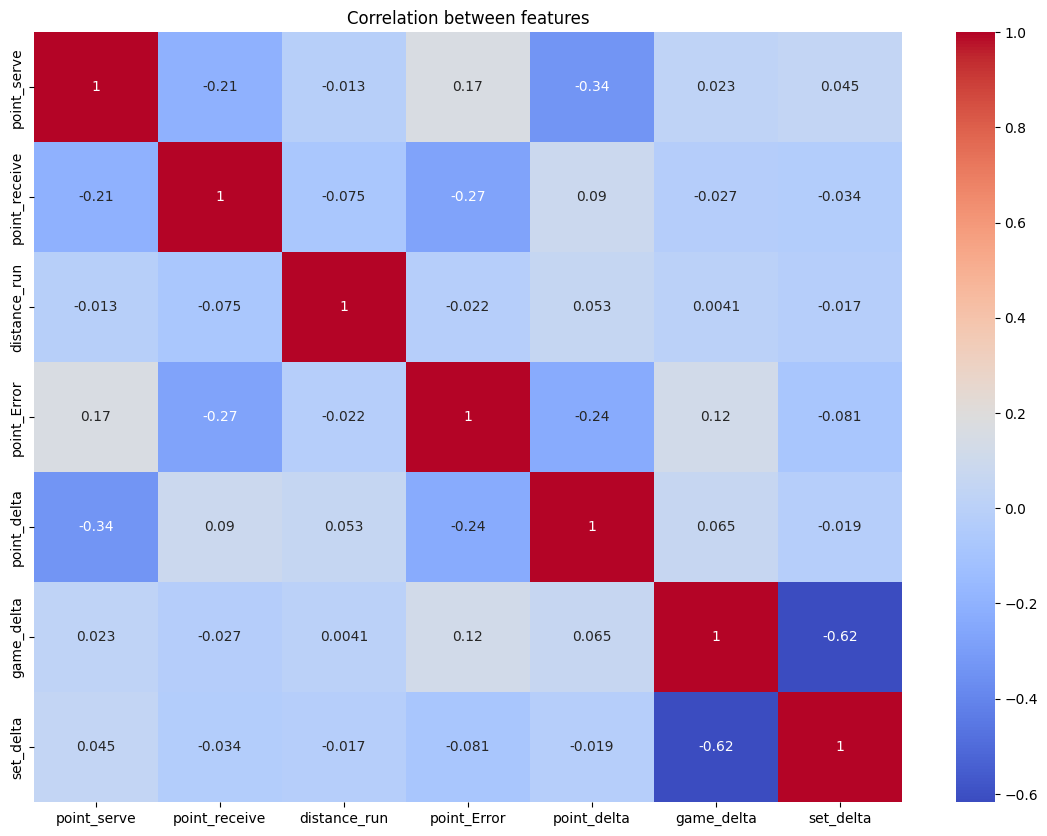

In [5]:
import pandas as pd
df = pd.read_csv('res.csv')
feature = df[['point_serve', 'point_receive', 'distance_run', 'point_Error', 'point_delta', 'game_delta', 'set_delta']].columns.tolist()
mean_corr = df[feature].corr()
print(mean_corr)

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 10))
sns.heatmap(mean_corr, annot=True, cmap='coolwarm')
plt.title('Correlation between features')
plt.show()

In [6]:
dataVar=[]
for i,_ in enumerate(indexNew1):
    tmp=[]
    tmp.append(indexNew1[i])
    tmp.append(indexNew2[i])
    tmp.append(indexNew3[i])
    tmp.append(indexNew4[i])
    tmp.append(indexNew5[i])
    tmp.append(indexNew6[i])
    # tmp.append(indexNew7[i])
    dataVar.append(tmp)
A=np.array(dataVar)
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
print(pca.fit_transform(A)) # 输出降维后的数据

[[-0.02703108 -0.14210666 -0.24114545]
 [-0.13458414 -0.05647473 -0.19310142]
 [ 0.77206322  0.1164918   0.16571941]
 ...
 [-0.21131159 -0.12867644  0.15120178]
 [-0.12751923  0.09335407 -0.30476045]
 [-0.23980551 -0.13024716  0.18964068]]


In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model=SVC()
model.fit(A, trainY)
result=[]

for last_id in matchid[1:]:
    index1 = []
    index2 = []
    index1.append(0)
    index2.append(0)
    index3 = []
    index4 = []
    index5 = []
    index6 = []
    index7 = []
    testY = []
    testX = []
    for item in l:
        if item[0] == last_id:
                index1.append(item[1])
                index1.append(item[2])
                index2.append(item[3])
                index2.append(item[4])
                index3.append(item[5])
                index3.append(item[6])
                index4.append(item[7])
                index4.append(item[8])
                index5.append(item[9])
                index5.append(item[10])
                index6.append(item[11])
                index6.append(item[12])
                index7.append(item[13])
                index7.append(item[14])
                if item[15] == 1:
                    testY.append(1)
                    testY.append(0)
                else:
                    testY.append(0)
                    testY.append(1)

    index1.pop()
    index2.pop()
    # 数据归一化
    index1 = np.array(index1)
    index2 = np.array(index2)
    index3 = np.array(index3)
    index4 = np.array(index4)
    index5 = np.array(index5)
    index6 = np.array(index6)
    index7 = np.array(index7)
    # index5 = np.array(index5)
    indexNew1 = [(i-min(index1))/(max(index1)-min(index1)) for i in index1]
    indexNew2 = [(i-min(index2))/(max(index2)-min(index2)) for i in index2]
    # 距离 发球失误是负指标，所以需要取max-x
    indexNew3 = [(max(index3)-i)/(max(index3)-min(index3)) for i in index3]
    # indexNew3 = [0.0 for i in index3]
    indexNew4 = [(max(index4)-i)/(max(index4)-min(index4)) for i in index4]
    indexNew5 = [(i-min(index5))/(max(index5)-min(index5)) for i in index5]
    indexNew6 = [(i-min(index6))/(max(index6)-min(index6)) for i in index6]
    indexNew7 = [(i-min(index7))/(max(index7)-min(index7)) for i in index7]
    for i,_ in enumerate(indexNew1):
        tmp=[]
        tmp.append(indexNew1[i])
        tmp.append(indexNew2[i])
        tmp.append(indexNew3[i])
        tmp.append(indexNew4[i])
        tmp.append(indexNew5[i])
        tmp.append(indexNew6[i])
        # tmp.append(indexNew7[i])
        testX.append(tmp)
    B=np.array(testX)
    # 模型评价
    predictions = model.predict(B)
    print(predictions)
    accuracy = accuracy_score(testY, predictions)
    print(last_id,':',accuracy)
    result.append(accuracy)
print(sum(result)/len(result))
print(max(result))
print(min(result))

[1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1
 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1
 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1
 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1
 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1
 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1
 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1
 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0
 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1
 0 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0
 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 1]
1302 : 0.7711442786069652
[1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1
 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1
 0 1 0 0

In [8]:
df = pd.read_excel(r'2023-wimbledon-男单(5场).xlsx')
#print(df.head())
l=[]
for index, row in df.iterrows():
    # 计算变量值
    point_Faqiu1 = (1 if int(row['server'])==1 and int(row['point_victor'])==1 else 0) + int(row['p1_ace']) + int(row['p1_winner'])
    point_Faqiu2 = (1 if int(row['server'])==2 and int(row['point_victor'])==2 else 0) + int(row['p2_ace']) + int(row['p2_winner'])
    # point_Faqiu1 = (1 if int(row['server'])==1 and int(row['point_victor'])==1 else 0)
    # point_Faqiu2 = (1 if int(row['server'])==2 and int(row['point_victor'])==2 else 0)

    point_Jieqiu1 = 1 if int(row['server'])==2 and int(row['point_victor'])==1 else 0
    point_Jieqiu2 = 1 if int(row['server'])==1 and int(row['point_victor'])==2 else 0
    d1 = float(row['p1_distance_run'])
    d2 = float(row['p2_distance_run'])
    point_Error1 = int(row['p1_double_fault']) + (1 if int(row['server'])==1 and int(row['serve_no'])==2 else 0)
    point_Error2 = int(row['p2_double_fault']) + (1 if int(row['server'])==2 and int(row['serve_no'])==2 else 0)
    point_delta1 = int(point[str(row['p1_score'])]-point[str(row['p2_score'])])
    point_delta2 = int(point[str(row['p2_score'])]-point[str(row['p1_score'])])
    game_delta1 = int(row['p1_games'])-int(row['p2_games'])
    game_delta2 = int(row['p2_games'])-int(row['p1_games'])
    set_delta1 = int(row['p1_sets'])-int(row['p2_sets'])
    set_delta2 = int(row['p2_sets'])-int(row['p1_sets'])
    # 保存到列表
    l.append([int(row['match_id'][-4:]), point_Faqiu1, point_Faqiu2, 
              point_Jieqiu1, point_Jieqiu2,
                d1, d2,
                point_Error1, point_Error2,
                point_delta1, point_delta2,
                game_delta1, game_delta2,
                set_delta1, set_delta2,
                int(row['point_victor'])])
print(l)

[[1101, 0, 1, 0, 0, 7.486, 5.931, 0, 0, 0, 0, 0, 0, 0, 0, 2], [1101, 1, 0, 1, 0, 9.093, 10.694, 0, 0, -1, 1, 0, 0, 0, 0, 1], [1101, 0, 0, 1, 0, 9.013, 5.828, 0, 2, 0, 0, 0, 0, 0, 0, 1], [1101, 0, 0, 1, 0, 3.617, 2.871, 0, 2, 1, -1, 0, 0, 0, 0, 1], [1101, 0, 2, 0, 0, 34.272, 27.526, 0, 0, 1, -1, 0, 0, 0, 0, 2], [1101, 0, 0, 1, 0, 18.006, 16.585, 0, 1, 1, -1, 0, 0, 0, 0, 1], [1101, 3, 0, 0, 0, 1.042, 1.17, 0, 0, 0, 0, 1, -1, 0, 0, 1], [1101, 1, 0, 0, 0, 39.516, 35.703, 1, 0, 1, -1, 1, -1, 0, 0, 1], [1101, 1, 0, 0, 0, 3.275, 4.316, 0, 0, 2, -2, 1, -1, 0, 0, 1], [1101, 1, 0, 0, 0, 5.8, 6.852, 1, 0, 3, -3, 1, -1, 0, 0, 1], [1101, 0, 0, 1, 0, 10.083, 8.314, 0, 1, 0, 0, 2, -2, 0, 0, 1], [1101, 0, 1, 0, 0, 12.518, 10.731, 0, 0, 1, -1, 2, -2, 0, 0, 2], [1101, 0, 2, 0, 0, 34.665, 9.04, 0, 0, 0, 0, 2, -2, 0, 0, 2], [1101, 0, 0, 1, 0, 2.91, 2.235, 0, 2, -1, 1, 2, -2, 0, 0, 1], [1101, 0, 1, 0, 0, 5.739, 5.538, 0, 1, 0, 0, 2, -2, 0, 0, 2], [1101, 0, 0, 1, 0, 5.198, 2.769, 0, 2, -1, 1, 2, -2, 0, 0, 1

In [12]:
## 数据标准化
## x= [i-min(x) / max(x)-min(x) for i in x]
import numpy as np
# 比赛号集合
matchid = list(set(np.array([i[0] for i in l])))
matchid.sort()
# print(matchid)
result=[]
for last_id in matchid:
    index1 = []
    index2 = []
    index1.append(0)
    index2.append(0)
    index3 = []
    index4 = []
    index5 = []
    index6 = []
    index7 = []
    testY = []
    testX = []
    for item in l:
        if item[0] == last_id:
                index1.append(item[1])
                index1.append(item[2])
                index2.append(item[3])
                index2.append(item[4])
                index3.append(item[5])
                index3.append(item[6])
                index4.append(item[7])
                index4.append(item[8])
                index5.append(item[9])
                index5.append(item[10])
                index6.append(item[11])
                index6.append(item[12])
                index7.append(item[13])
                index7.append(item[14])
                if item[15] == 1:
                    testY.append(1)
                    testY.append(0)
                else:
                    testY.append(0)
                    testY.append(1)

    index1.pop()
    index2.pop()
    # 数据归一化
    index1 = np.array(index1)
    index2 = np.array(index2)
    index3 = np.array(index3)
    index4 = np.array(index4)
    index5 = np.array(index5)
    index6 = np.array(index6)
    index7 = np.array(index7)
    # index5 = np.array(index5)
    indexNew1 = [(i-min(index1))/(max(index1)-min(index1)) for i in index1]
    indexNew2 = [(i-min(index2))/(max(index2)-min(index2)) for i in index2]
    # 距离 发球失误是负指标，所以需要取max-x
    indexNew3 = [(max(index3)-i)/(max(index3)-min(index3)) for i in index3]
    # indexNew3 = [0.0 for i in index3]
    indexNew4 = [(max(index4)-i)/(max(index4)-min(index4)) for i in index4]
    indexNew5 = [(i-min(index5))/(max(index5)-min(index5)) for i in index5]
    indexNew6 = [(i-min(index6))/(max(index6)-min(index6)) for i in index6]
    indexNew7 = [(i-min(index7))/(max(index7)-min(index7)) for i in index7]
    for i,_ in enumerate(indexNew1):
        tmp=[]
        tmp.append(indexNew1[i])
        tmp.append(indexNew2[i])
        tmp.append(indexNew3[i])
        tmp.append(indexNew4[i])
        tmp.append(indexNew5[i])
        tmp.append(indexNew6[i])
        # tmp.append(indexNew7[i])
        testX.append(tmp)
    B=np.array(testX)
    # 模型评价
    predictions = model.predict(B)
    accuracy = accuracy_score(testY, predictions)
    from sklearn.metrics import roc_auc_score
    auc = roc_auc_score(testY, predictions)
    print(last_id,':',accuracy)
    print(last_id,':',auc)
    result.append(accuracy)

1101 : 0.7544910179640718
1101 : 0.7544910179640718
1102 : 0.7661290322580645
1102 : 0.7661290322580645
1103 : 0.7791095890410958
1103 : 0.779109589041096
1231 : 0.7748815165876777
1231 : 0.7748815165876777
1232 : 0.7638190954773869
1232 : 0.7638190954773869


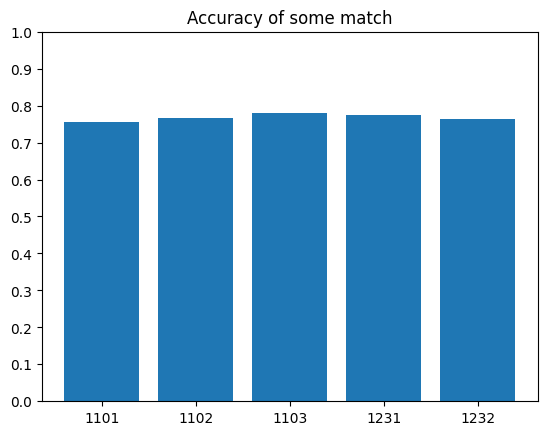

In [19]:
import matplotlib.pyplot as plt
label=matchid
y=result
plt.bar(np.arange(0,len(matchid),1),y, align='center',tick_label=label)
plt.yticks(np.arange(0,1.1,0.1))
plt.title('Accuracy of some match')
plt.show()

In [10]:
import numpy as np
from sklearn.svm import SVC

def calculate_robustness(X_train, y_train, X_test, y_test):
    # 训练SVM模型
    svm_model = SVC()
    svm_model.fit(X_train, y_train)

    # 在训练集和测试集上计算准确率
    train_accuracy = svm_model.score(X_train, y_train)
    test_accuracy = svm_model.score(X_test, y_test)

    # 计算鲁棒性指标
    robustness = abs(train_accuracy - test_accuracy)

    return robustness